In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {} # intialize an empty dictionary to store bigram counts
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # Add start and end tokens to the word list
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2) # Create a tuple representing the bigram
        # print(bigram)
        # b.get(bigram, o): retrieves the current count for the bigram, default to 0 if the bigram doesnt exist yet, else add 1 and stores it back in the dictionary.
        b[bigram] = b.get(bigram, 0) + 1 
        # print(ch1, ch2)

In [7]:
s = sorted(b.items(), key = lambda kv: -kv[1])
s[:50]
# b.items() returns a view object of key-value pairs in the dictionary as tuples

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch
import numpy as np


In [9]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [10]:
# indexing

a[1,3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
a[0,0] = 5
a

tensor([[5, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [12]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [13]:
joint_str = ''.join(words)
chars = sorted(list(set(joint_str)))
chars
# len(chars)

stoi = {s:i for i,s in enumerate(chars)} # create a dictionary that maps each char to a unique integet index.
stoi['<S>'] = 26
stoi['<E>'] = 27

In [14]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [15]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

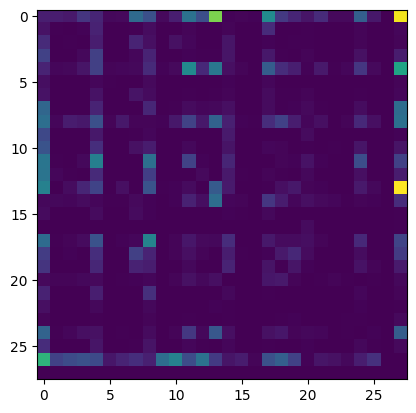

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

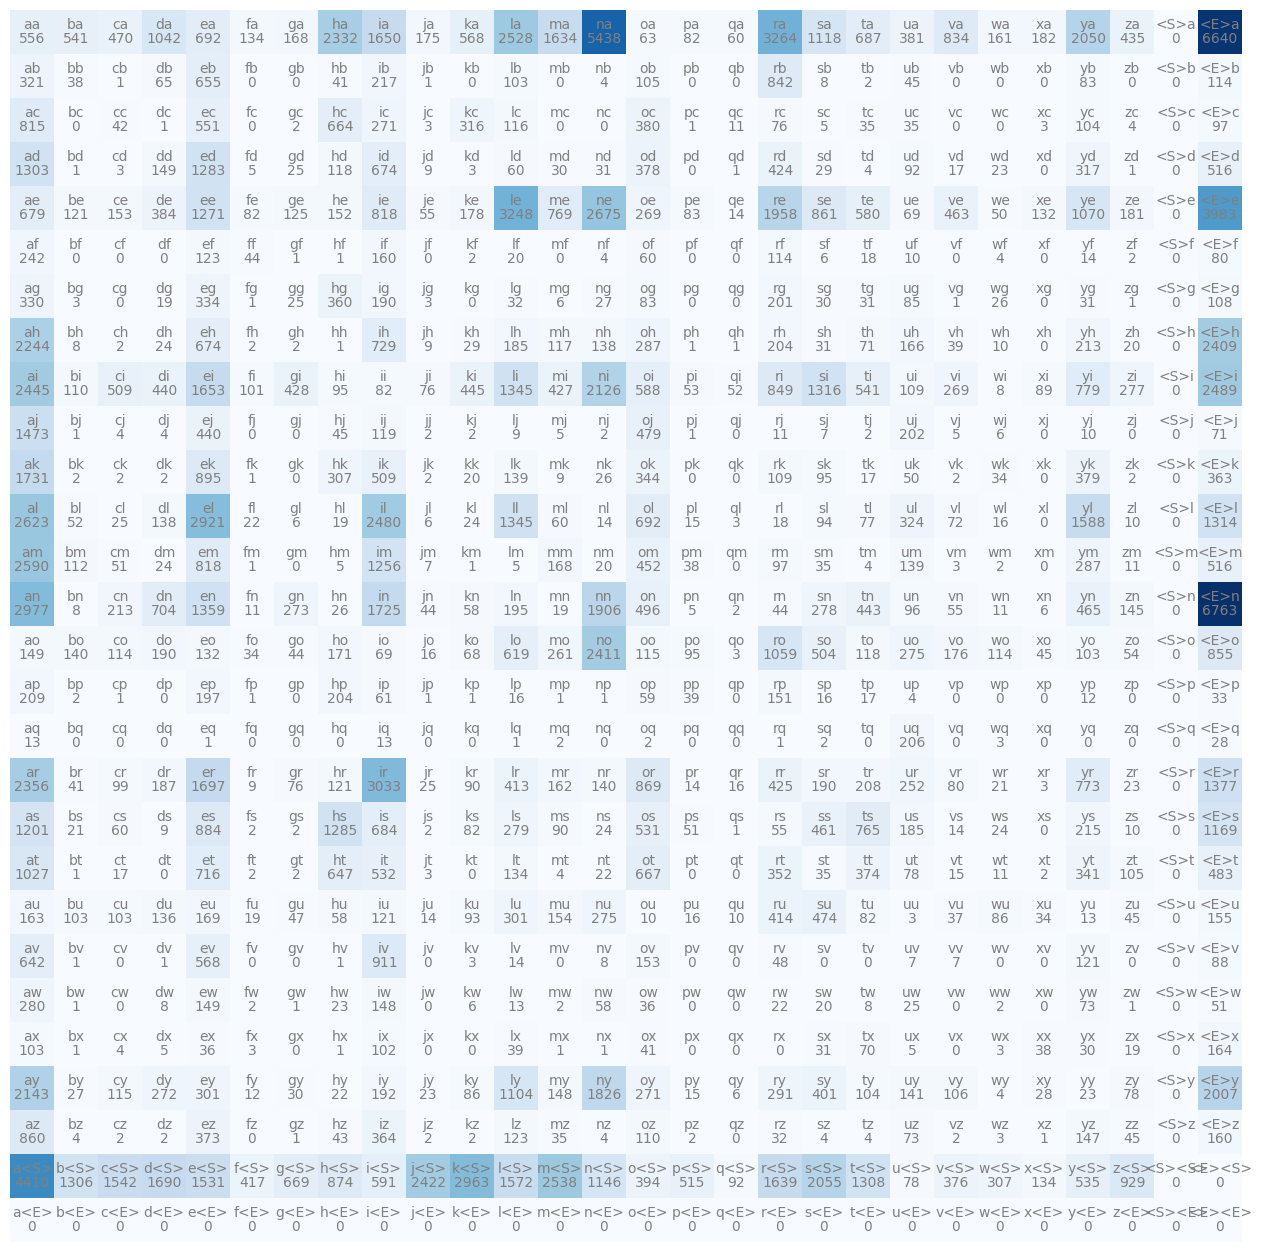

In [17]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off');

In [18]:
# The issue with the above encoding is that the `<S>` and `<E>` can be paired up with any char in the alphabet in any order.
# Which should not be logically correct, and creates unnecessaru row and column of encoding. 
# This code is revised to fix that.

N = torch.zeros((27, 27), dtype=torch.int32) # change the shape to 27

joint_str = ''.join(words)
chars = sorted(list(set(joint_str)))
chars
# len(chars)

stoi = {s:i+1 for i,s in enumerate(chars)} # shift the index for the first char `a` to index 1
stoi['.'] = 0 # change the index of the spcial char to index 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

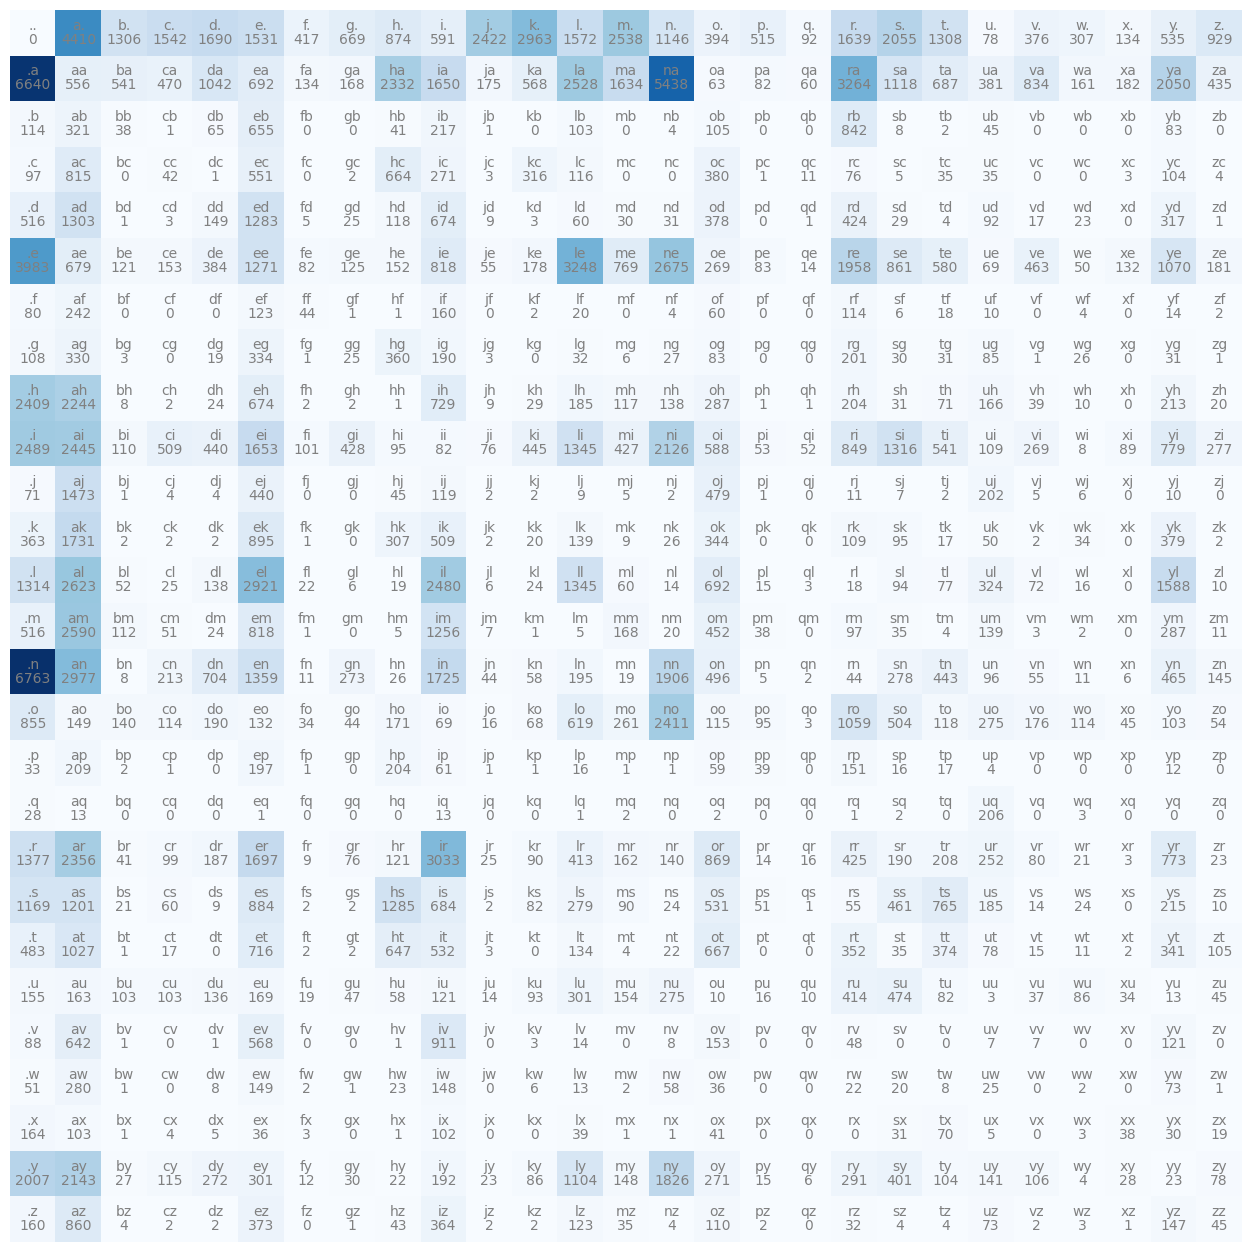

In [19]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27): # adjust the range to 27
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off');

In [20]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [21]:
p = N[0].float() # convert the value of this row from int to float for probability calculation
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [22]:
# Create a random number generator with a fixed seed for reproducibility or being deterministic
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g) # Generates a tensor of three random floats ([0.7081, 0.3542, 0.1054]) from a uniform distribution between 0 and 1.
p = p / p.sum() # normalize each element of the tensor to represent probabilities.
p

tensor([0.6064, 0.3033, 0.0903])

In [23]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [24]:
g = torch.Generator().manual_seed(2147483647)

# Sample a single index from the probability distribution above (p)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
ix

tensor([0])

In [25]:
ix.item() # get the number

0

In [26]:
ix = ix.item()
itos[ix] # get the character from the list based on this index number

'.'

In [27]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break

    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [28]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = torch.ones(27) / 27.0 # equal distribution -> untrained
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break

    print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.
ndxjxfpvslqtikyzsaloevgvvnundewkfmbjzqegruxiteaxchwtmurzsodridcdznojvaliypvrghvxtezrwguciqqvywhqelv.
viosvhibdhnceukgmtmwboscnbzoiwupnwnpipixtewbgsgyewfdacbfcxrvjypkmsbranmjrdsydotafvkdkbdepihzpwzsqdab.
vfuolwbasrtugttbiqbujfdtskceqjtcdlcndfujqllsppgkltalmlokdmsl.
fddmxjv.
mfsgxmw.
vdihkvngtojvrdsyqivcob.
uziengogtjvnvqgfjtkqufrxfjlwglykiiluohgnoiuwzylq.
fsgircvmhtipagkxwvjypnsriadmfujnlkcicvatjvryzeljxkbrlrjsp.


In [32]:
P.shape

torch.Size([27, 27])

In [33]:
P.sum(1, keepdim=True).shape # Squeeze all the rows' sums into 1 column

torch.Size([27, 1])

In [ ]:
# [27, 27]
# [27, 1]

In [30]:
P = N.float()
# P = P / P.sum(1, keepdim=True) # Normalize the probabilities for all pairs in the table
P /= P.sum(1, keepdim=True) # Inplace operation is more efficient as it does not create a temp tensor in memory

In [31]:
P[0].sum()

tensor(1.)

In [34]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    
    while True:
        p = P[ix] # This will produce the exact same result as above
        # p = N[ix].float() # Factor out this calculation for efficiency by using a the pre-calculated probability distribution list `P`
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break

    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [83]:
# Evaluate the model's prediction

log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
neg_log_likelihood = -log_likelihood
print(f'{neg_log_likelihood=}')

avg_nll = neg_log_likelihood / n
print(f'{avg_nll=}')

log_likelihood=tensor(-559951.5625)
neg_log_likelihood=tensor(559951.5625)
avg_nll=tensor(2.4544)


In [36]:
# Evaluate the model's prediction

log_likelihood = 0.0
n = 0

# The probability for the bigram `hx` is 0, so we get `inf` for log/
for w in ["linhx"]:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
neg_log_likelihood = -log_likelihood
print(f'{neg_log_likelihood=}')

avg_nll = neg_log_likelihood / n
print(f'{avg_nll=}')

.l: 0.0491 -3.0144
li: 0.1777 -1.7278
in: 0.1201 -2.1194
nh: 0.0014 -6.5580
hx: 0.0000 -inf
x.: 0.2353 -1.4469
log_likelihood=tensor(-inf)
neg_log_likelihood=tensor(inf)
avg_nll=tensor(inf)


In [80]:
# To fix this, smooth out the model with a fake count, e.g add 1, to ensure that no bigram will return `0` prob.
# The more we add, the more uniform the model is going to get, the less, the more peaked.
P = (N + 1).float()
P /= P.sum(1, keepdim=True)

# Evaluate the model's prediction

log_likelihood = 0.0
n = 0

# The probability for the bigram `hx` is now small enough to avoid inf.
for w in ["linhx"]:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
neg_log_likelihood = -log_likelihood
print(f'{neg_log_likelihood=}')

avg_nll = neg_log_likelihood / n
print(f'{avg_nll=}')

.l: 0.0491 -3.0146
li: 0.1774 -1.7293
in: 0.1200 -2.1204
nh: 0.0015 -6.5218
hx: 0.0001 -8.9415
x.: 0.2279 -1.4788
log_likelihood=tensor(-23.8065)
neg_log_likelihood=tensor(23.8065)
avg_nll=tensor(3.9678)


In [38]:
# Create the training set of igrams (x, y)
input_char_indices, target_char_indices = [], []

for w in words[:1]:
    chars = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chars, chars[1:]):
        prev_index = stoi[ch1]
        next_index = stoi[ch2]

        print(ch1, ch2)

        input_char_indices.append(prev_index)
        target_char_indices.append(next_index)

input_tensor = torch.tensor(input_char_indices)
target_tensor = torch.tensor(target_char_indices)

. e
e m
m m
m a
a .


In [39]:
input_tensor

tensor([ 0,  5, 13, 13,  1])

In [40]:
target_tensor

tensor([ 5, 13, 13,  1,  0])

In [41]:
import torch.nn.functional as F

# By default, torch.nn.functional.one_hot() returns a rensor of `dtype=torch.int64`, but we want `float32` in ML app.
# Neural networks expect floating-point inpputs for operations like matrix mult and activations (ReLU, softmax). Casting during computations adds overhead.
# Loss functions usually expect floating-point inputs
# Gradient based optimization such as backpropagation requires floating-point numbers, and efficient for GPU computations.
input_encoded = F.one_hot(input_tensor, num_classes=27).float()
input_encoded

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
input_encoded.dtype

torch.float32

In [43]:
input_encoded.shape

torch.Size([5, 27])

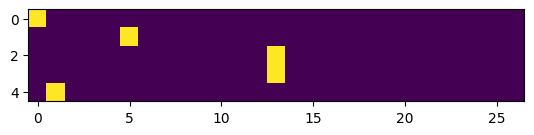

In [44]:
plt.imshow(input_encoded)

In [45]:
W = torch.randn((27, 1)) # Initialize a random matrix of weights
W

tensor([[-2.5486e-01],
        [-1.0507e+00],
        [-7.9748e-01],
        [-3.1043e-02],
        [-9.0253e-01],
        [ 3.1895e-01],
        [-2.0680e-01],
        [-4.9174e-01],
        [-9.9562e-01],
        [ 9.6099e-02],
        [ 1.0875e+00],
        [-1.9131e+00],
        [-2.8356e-01],
        [-5.4690e-01],
        [ 1.6001e-01],
        [ 5.6721e-02],
        [-2.4020e+00],
        [ 3.4559e-01],
        [ 1.1256e+00],
        [-2.2650e-02],
        [-1.4658e+00],
        [-7.7769e-01],
        [-1.1028e+00],
        [ 6.2817e-01],
        [-6.3764e-01],
        [-6.4065e-01],
        [-7.6144e-04]])

In [46]:
input_encoded @ W # (5, 27) @ (27, 1) -> (5, 1)

tensor([[-0.2549],
        [ 0.3189],
        [-0.5469],
        [-0.5469],
        [-1.0507]])

In [47]:
W = torch.randn((27, 27))
input_encoded @ W # -> (5, 27)

tensor([[-0.5896, -1.0586, -0.2743,  1.0951, -1.3283,  0.9398, -1.8658, -0.9609,
         -1.4066, -0.3500,  0.1799, -0.2932,  0.9792, -0.7810, -0.2587,  1.1112,
          0.6782, -1.1566,  1.3859,  0.0210, -0.8564, -0.5904, -1.4532,  1.6222,
          1.6679,  0.2011,  0.0862],
        [-1.4761, -1.1684,  1.3714,  0.1556, -0.3702, -0.3137, -0.2927,  0.0731,
          0.3034, -0.0708, -0.0252,  0.1988,  0.8320,  0.7899, -1.5084,  0.0609,
         -2.1736, -0.8074, -1.1955, -1.1592, -0.3260, -0.7304, -0.3825, -1.0404,
          0.3467,  0.4955, -1.8378],
        [ 0.4023,  0.8845,  0.1005, -0.9849,  2.8199,  1.2971,  0.2959,  0.2512,
          0.6284, -0.2329, -1.7735, -1.6571, -1.0593, -1.8270, -1.6702,  0.0565,
         -0.5152, -1.0432,  0.3503,  0.7712, -1.4016,  0.1455,  0.5623, -0.1458,
          0.9501,  0.8008, -0.4971],
        [ 0.4023,  0.8845,  0.1005, -0.9849,  2.8199,  1.2971,  0.2959,  0.2512,
          0.6284, -0.2329, -1.7735, -1.6571, -1.0593, -1.8270, -1.6702,  0.0565

In [48]:
(input_encoded @ W)[3,13] # this is matrix multiplication done efficiently instead of writing the code below

tensor(-1.8270)

In [49]:
(input_encoded[3] * W[:,13]).sum()

tensor(-1.8270)

In [50]:
logits = input_encoded @ W # log-counts
counts = logits.exp() # equivalent to N matrix that represent the counts of the bigrams
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0142, 0.0089, 0.0195, 0.0766, 0.0068, 0.0656, 0.0040, 0.0098, 0.0063,
         0.0181, 0.0307, 0.0191, 0.0682, 0.0117, 0.0198, 0.0778, 0.0505, 0.0081,
         0.1024, 0.0262, 0.0109, 0.0142, 0.0060, 0.1297, 0.1358, 0.0313, 0.0279],
        [0.0089, 0.0121, 0.1528, 0.0453, 0.0268, 0.0283, 0.0289, 0.0417, 0.0525,
         0.0361, 0.0378, 0.0473, 0.0891, 0.0854, 0.0086, 0.0412, 0.0044, 0.0173,
         0.0117, 0.0122, 0.0280, 0.0187, 0.0265, 0.0137, 0.0548, 0.0636, 0.0062],
        [0.0317, 0.0513, 0.0234, 0.0079, 0.3553, 0.0775, 0.0285, 0.0272, 0.0397,
         0.0168, 0.0036, 0.0040, 0.0073, 0.0034, 0.0040, 0.0224, 0.0127, 0.0075,
         0.0301, 0.0458, 0.0052, 0.0245, 0.0372, 0.0183, 0.0548, 0.0472, 0.0129],
        [0.0317, 0.0513, 0.0234, 0.0079, 0.3553, 0.0775, 0.0285, 0.0272, 0.0397,
         0.0168, 0.0036, 0.0040, 0.0073, 0.0034, 0.0040, 0.0224, 0.0127, 0.0075,
         0.0301, 0.0458, 0.0052, 0.0245, 0.0372, 0.0183, 0.0548, 0.0472, 0.0129],
        [0.1476, 0.0903,

In [51]:
probs[0].sum()

tensor(1.)

In [52]:
probs.shape

torch.Size([5, 27])

In [53]:
probs[0].shape

torch.Size([27])

<<<<<<<<<<<<<<<<<<<<< SUMMARY >>>>>>>>>>>>>>>>>>>>>>>>>>

In [54]:
input_tensor

tensor([ 0,  5, 13, 13,  1])

In [55]:
target_tensor

tensor([ 5, 13, 13,  1,  0])

In [56]:
# randomly initialize 27 neurons' weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [57]:
input_encoded = F.one_hot(input_tensor, num_classes=27).float() # input to the network: one-hot encoding
logits = input_encoded @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# the last 2 lines are together called a `softmax` function logic

In [58]:
probs.shape

torch.Size([5, 27])

In [59]:
nlls = torch.zeros(5)

for i in range(5):
    #i-th bigram:
    x = input_tensor[i].item()
    y = target_tensor[i].item()
    print("------------------------------------------------------------")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=================')
print('Average negative log likelihood, i.e, loss =', nlls.mean().item())

------------------------------------------------------------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
------------------------------------------------------------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472]

<<<<<<<<<<<<<<<<< OPTIMIZATION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [60]:
input_tensor

tensor([ 0,  5, 13, 13,  1])

In [61]:
target_tensor

tensor([ 5, 13, 13,  1,  0])

In [62]:
# randomly initialize 27 neurons' wrights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [63]:
probs.shape

torch.Size([5, 27])

In [64]:
# these are the probabilities that we want
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [65]:
# instead of extracting each one as done above, we can use torch.arange 
r = torch.arange(5)
p = probs[r, target_tensor]
p

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [66]:
loss = -p.log().mean() # this is the vectorized form of the avarage log likelihood calculated above
loss

tensor(3.7693)

In [78]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [86]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input in the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + (-0.1 * (W**2).mean())
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

2.251542568206787
2.245128631591797
2.2388510704040527
2.2326338291168213
2.226438283920288
2.2202391624450684
2.2140190601348877
2.207761764526367
2.20145583152771
2.1950910091400146
2.188657522201538
2.1821465492248535
2.1755504608154297
2.1688621044158936
2.162073850631714
2.155179738998413
2.1481716632843018
2.1410443782806396
2.133790969848633
2.1264052391052246
2.118880271911621
2.111210584640503
2.103389024734497
2.095409631729126
2.087265968322754
2.078951597213745
2.0704591274261475
2.0617830753326416
2.052915573120117
2.0438501834869385
2.0345799922943115
2.0250978469848633
2.0153961181640625
2.005467414855957
1.995304822921753
1.984899878501892
1.9742450714111328
1.9633324146270752
1.952152967453003
1.9406991004943848
1.9289617538452148
1.9169316291809082
1.9046008586883545
1.8919590711593628
1.8789973258972168
1.8657057285308838
1.8520739078521729
1.8380919694900513
1.8237497806549072
1.8090362548828125
1.793940544128418
1.7784509658813477
1.7625563144683838
1.7462444305419